<a href="https://colab.research.google.com/github/ferbator/data-engineering/blob/main/tests/M33071_Karepin_Denis_%D0%9A%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82_1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Рубежная контрольная работа

*Эту работу выполнять не обязательно. Баллы, набранные за эту контрольную работу просуммируются с баллами, которые будут набраны за контрольную работу 2 и выставлены как оценка за экзамен "автоматом". Если вы не выполните эту работу, переписать её будет невозможно, просто приходите на экзамен и добирайте баллы там.*

Сделайте копию ноутбука

Присвойте переменной `v` значение свой табельный номер ИСУ, это нужно для определения вашего варианта. Запустите код в следующей ячейке.

In [ ]:
from datetime import datetime
current_datetime = datetime.now()
print(current_datetime)
v = 311446 # по умолчанию вписан мой номер

2022-10-26 08:51:31.675422


## Описание метрического алгоритма

Пусть задана обучающая выборка пар "объект-ответ" $X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}.$

Пусть на множестве объектов задана функция расстояния $\rho(x,x')$. Чем больше значение этой функции, тем менее схожими являются два объекта $x, x'$. 
В простейшем случае используется евклидова метрика: $\rho(x,x') = \sqrt {\sum _{i=1}^{n}(x_{i}-x'_{i})^{2}}$,

Для произвольного объекта $u$ расположим объекты обучающей выборки $x_i$ в порядке возрастания расстояний до $u$:

$$\rho(u,x_{1; u}) \leq  \rho(u,x_{2; u}) \leq \cdots \leq \rho(u,x_{m; u}),$$
где через $x_{i; u}$ обозначается тот объект обучающей выборки, который является $i$-м соседом объекта $u$. Аналогичное обозначение введём и для ответа на $i$-м соседе: $y_{i; u}$. Таким образом, произвольный объект $u$ порождает свою перенумерацию выборки. В наиболее общем виде алгоритм ближайших соседей есть:
$$a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] w(i,u),$$
где $w(i,u)$ - заданная весовая функция, которая оценивает степень важности $i$-го соседа для классификации объекта $u$. Естественно полагать, что эта функция не отрицательна и не возрастает по $i$ (поскольку чем дальше объект, тем меньший вклад он должен вносить в пользу своего класса).

По-разному задавая весовую функцию, можно получать различные варианты метода ближайших соседей.

$w(i,u) = [i=1]$ - простейший метод ближайшего соседа;

$w(i,u) = [i\leq k]$ - метод $k$ ближайших соседей;

$w(i,u) = [i\leq k] q^i$ - метод $k$ экспоненциально взвешенных ближайших соседей, где предполагается константа $q < 1$




**Использование ядер сглаживания**

Для избежания неоднозначности ответа при классификации в качестве весовой функции $w(i, u)$ используют функцию ядра $K(r)$

Примеры ядер:

Triangular: ${\displaystyle K(r)=(1-|r|)}$,

Parabolic: ${\displaystyle K(r)={\frac {3}{4}}(1-r^{2})}$,

Tricube: ${\displaystyle K(r)={\frac {70}{81}}(1-{\left|r\right|}^{3})^{3}}$.

**Метод парзеновского окна**

Алгоритм $k$ ближайших соседей можно обобщить с помощью функции ядра. Рассмотрим два способа, которыми это можно сделать.

Метод парзеновского окна фиксированной ширины  $h$:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Метод парзеновского окна переменной ширины:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$

Таким образом классификаторы, полученные при использовании этих методов, можно записать в следующем виде

Фиксированной ширины: $$a_h = a(u, X^m, \boldsymbol{h}, K) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Переменной ширины (фиксированное число соседей): 
$$a_k = a(u, X^m, \boldsymbol{k}, K) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$


# Задание 1 (7 баллов)

В задании требуется написать свою реализацию метрического алгоритма. 

В качестве расстояния между объектами в этом задании используйте евклидово расстояние. 

В качестве функции ядра используйте Triangular.

Triangular: ${\displaystyle K(r)=(1-|r|)}$,

Для выбора варианта, запустите код в следующей ячейке



In [ ]:
if (int(str(v)[4]) % 2) == 0:
  print ('1.1 В алгоритме число соседей должно быть фиксированным. Настроить гиперпараметр k, для оценки качества использовать ROC-AUC')
else:
  print ('1.1 В алгоритме число соседей не должно быть фиксированным. Настроить гиперпараметр h (ширина окна), для оценки качества использовать использовать F1-меру')

if (int(str(v)[4]) % 2) == 0:
  print ('1.2 Построить график зависимости метрики качества на обучающей выборке от k')
else: 
  print ('1.2 Построить график зависимости метрики качества на контрольной выборке от h')

1.1 В алгоритме число соседей должно быть фиксированным. Настроить гиперпараметр k, для оценки качества использовать ROC-AUC
1.2 Построить график зависимости метрики качества на обучающей выборке от k


Протестирйуте эту реализацию на наборе данных breast_cancer:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

Может потребоваться предобработка данных

Штрафы:
* отсутствие реализации алгоритма (4 балла)
* ошибки в реализации алгоритма (2 балла)
* отсутствие настройки гиперпараметра (2 балла)
* ошибки в настройке гиперпараметра (1 балл)
* отсутствие графика (1 балл)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
def calculate_kernel(r):
  return (1 - np.abs(r))

In [ ]:
def classifyKNN(k, X_train, y_train, X_test):
  result = []
  for i in range(X_test.shape[0]):
    dist_y = []
    for j in range(X_train[0].shape[0]):
      dist_y.append(
          (np.linalg.norm(X_test.iloc[i].values -  X_train.iloc[j].values), 
                    y_train.iloc[j].values[0]))
    dist_y.sort()
    nearest_neighbors = dist_y[:k + 1]
    kernel = [(calculate_kernel(pair[0] / nearest_neighbors[k][0]), pair[1]) 
    for pair in nearest_neighbors][:-1]

    good = 0
    bad = 0

    for pair in kernel:
      if pair[1] == 0:
        bad += pair[0]
      else:
        good += pair[0]

    if bad > good:
      result.append(0)
    else:
      result.append(1)

  return result

In [ ]:
result = classifyKNN(15, X_train, y_train, X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, result))

0.9472746331236898


In [ ]:
import matplotlib.pyplot as plt

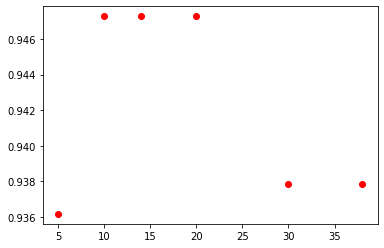

In [ ]:
for i in (5, 10, 14, 20, 30, 38):
    result = classifyKNN(i, X_train, y_train, X_test)
    plt.scatter(i, roc_auc_score(y_test, result), color='r')
plt.show()

# Задание 2 (4 балла)

Требуется реализовать метрический алгоритм для предсказания действительного числа (то есть как в задаче регрессии, а не как в задаче классификации). 

В задании 2 не используйте ядра и метод парзеновского окна.

Во этом задании в качестве исходных данных используется словарь кинокритиков и выставленных ими оценок

In [ ]:
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

По этому словарю нужно сделать Dataframe в pandas. Строки это критики, столбцы - названия фильмов. На пересечении поставленные оценки. При отсуствии оценки у критика за фильм в датафрейме нужно поставить 0.

Для выбора варианта, запустите код в следующей ячейке

In [ ]:
if (int(str(v)[3]) % 2) == 0:
  print ('2.1 Сделайте предсказание оценок для критика Toby по фильмам, которые он ещё не видел')
else:
  print ('2.1 Сделайте предсказание оценок для фильма You, Me and Dupree по критикам, которые его ещё не видели')
print ('2.2 Объясните как оценить качество полученного предказания')

Штрафы:
* отсутствие реализации алгоритма (2 балла)
* ошибки в реализации алгоритма (1 балл)
* отсутствие тестирования алгоритма (1 балл)
* отсутствие объяснения оценки качества алгоритма (1 балл)

После завершения контрольной работы, дайте ссылку на ноутбук в отдельном followup в своей теме на Piazza. Дайте разрешение на его просмотр.

Не забудьте запустить код в последней ячейке для контроля времени выполнения.

In [ ]:
current_datetime = datetime.now()
print(current_datetime)

2022-10-26 10:01:38.908528
